In [1]:
from utils import get_all_data, read_dataset, mean_square_error,generateSinData
from gp import GaussianProcess, SparseGaussianProcess
from kernels import ARDKernel
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
domain = np.linspace(-2*np.pi, 2*np.pi, 100)
Xdomain = np.matrix([[point,np.random.randn(1)] for point in domain])
X,Y = generateSinData(100)
# shuffeling the input
indices = np.arange(len(Y))
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

In [4]:
sgp = SparseGaussianProcess(X,Y,20)
fullgp = GaussianProcess(X,Y) 

In [5]:
spred= sgp.getPosteriorPredictive()

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


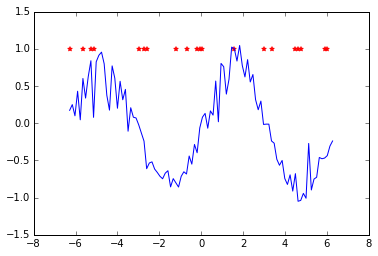

In [6]:
mu, covar = spred(Xdomain)
plt.plot(Xdomain[:,0],mu)
plt.scatter(sgp.pseudo_points.eval()[:,0],np.ones(sgp.M),color="red",marker="*")

In [6]:
cost = []
rms = sgp.Adam()

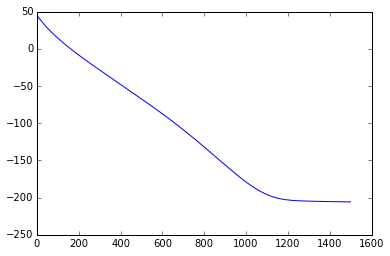

In [9]:
for i in range(500):
    cost.append(rms())
plt.plot(cost)

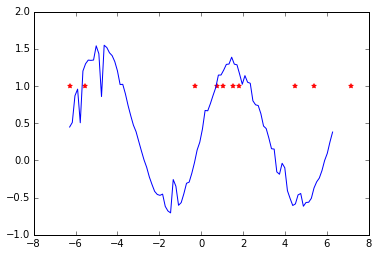

In [40]:
smu, scovar = spred(Xdomain)
plt.plot(Xdomain[:,0],smu)
plt.scatter(sgp.pseudo_points.eval()[:,0],np.ones(sgp.M),color="red",marker="*")

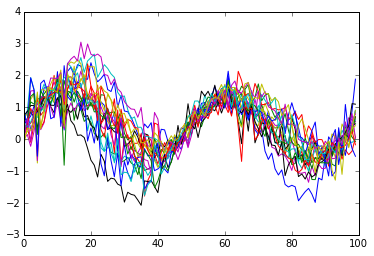

In [42]:
samples = np.random.multivariate_normal(smu.T[0],scovar,20)
plt.plot(samples.T)

In [12]:
cost = []
rms = fullgp.RMSprop()

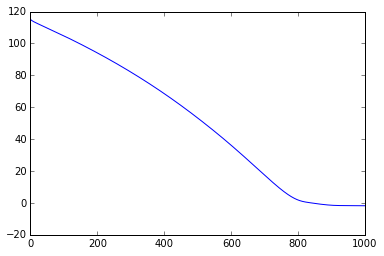

In [14]:
for i in range(500):
    cost.append(rms())
plt.plot(cost)

In [15]:
fpred= fullgp.getPosteriorPredictive()

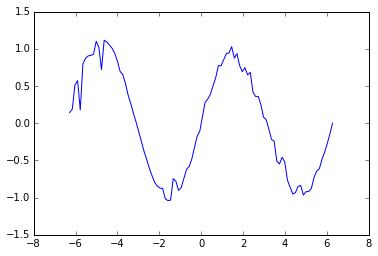

In [16]:
mu, covar = fpred(Xdomain)
plt.plot(Xdomain[:,0],mu)

In [36]:
samples = np.random.multivariate_normal(mu.T[0],covar,20)

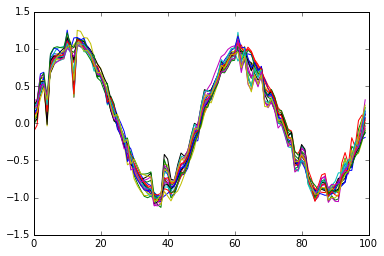

In [37]:
plt.plot(samples.T)

In [ ]:
samples = np.random.multivariate_normal(mu.T[0],covar,20)